In [4]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
mars_map = np.load('mars_map.npy')
nr, nc = mars_map.shape


In [5]:
mars_map

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], shape=(1815, 756))

In [6]:
print(nr, nc)

1815 756


/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_61562/3300437665.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


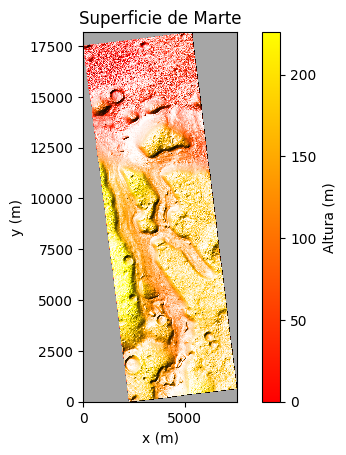

In [7]:
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
scale=10.0174
ls = LightSource(315, 45)
rgb = ls.shade(mars_map, cmap=cmap, vmin = 0, vmax = mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = mars_map.max(), 
                extent =[0, scale*nc, 0, scale*nr], 
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.show()


In [8]:
def cyr(matriz,x,y,scale):
    nr,nc=matriz.shape
    r=nr-round(y/scale)
    c=round(x/scale)
    return r,c


In [9]:
r,c=cyr(mars_map, 2850, 6400, scale)
print(mars_map[r-1,c-1])
print(r,c)

145.92828125000014
1176 285


In [10]:
def diferencia_altura(matriz,nodo1,nodo2):
    r1,c1=nodo1
    ra1,ca1=cyr(matriz,c1,r1,scale)
    r2,c2=nodo2
    ra2,ca2=cyr(matriz,c2,r2,scale)
    altura1=matriz[ra1-1,ca1-1]
    altura2=matriz[ra2-1,ca2-1]
    if altura1==-1 or altura2==-1:
        return False 
    distancia=np.abs(altura1-altura2)
    if distancia<0.25:
        return True
    else:
        return False
    

In [11]:
nodo1=(5001,5001)
nodo2=(5000,5000)
print(diferencia_altura(mars_map,nodo1,nodo2))

True


In [12]:
def obtener_vecinos(matriz, nodo):
    vecinos = []
    acciones = [(-1, 0), (1, 0), (0, -1), (0, 1),(1,1),(-1,1),(1,-1),(-1,-1)]  
    r, c = matriz.shape
    x, y = nodo
    for dx, dy in acciones:
        nx, ny = x + dx, y + dy
        if  diferencia_altura(matriz,nodo,(nx,ny)):  
            vecinos.append((nx, ny))
    return vecinos

In [13]:
nodo1=(5000,5000)
print(obtener_vecinos(mars_map,nodo1))

[(4999, 5000), (5001, 5000), (5000, 4999), (5000, 5001), (5001, 5001), (4999, 5001), (5001, 4999), (4999, 4999)]


In [14]:
def bfs(matriz, origen, objetivo):
    explorados = [origen]
    frontera = [origen]
    padres = {origen: None}  

    while frontera:
        inicio = frontera.pop(0)
        if inicio == objetivo:
            break
        for vecino in obtener_vecinos(matriz, inicio):
            if vecino not in explorados:
                explorados.append(vecino)
                frontera.append(vecino)
                padres[vecino] = inicio  
    camino = []
    paso = objetivo
    while paso is not None:
        camino.append(paso)
        paso = padres[paso]
    camino.reverse() 

    return camino

In [ ]:
origen=(5000,6400)
destino=(5200,6410)
camino=bfs(mars_map,origen,destino)
print(camino)
print(len(camino))

In [ ]:
def dfs(matriz, origen, objetivo, limite_profundidad=5000):
    stack = [(origen, 0)] 
    explorados = set()  
    padres = {origen: None}  

    while stack:
        inicio, profundidad = stack.pop()

        if profundidad > limite_profundidad:  
            continue

        if inicio == objetivo:
            break

        if inicio not in explorados:
            explorados.add(inicio)

            for vecino in obtener_vecinos(matriz, inicio):
                if vecino not in explorados and vecino not in [x[0] for x in stack]:
                    stack.append((vecino, profundidad + 1))
                    padres[vecino] = inicio

    if objetivo not in padres:
        return []

    camino = []
    paso = objetivo
    while paso is not None:
        camino.append(paso)
        paso = padres.get(paso, None)

    camino.reverse()
    return camino


origen=(5000,6400)
destino=(5200,6410)
camino_dfs = dfs(mars_map, origen, destino, limite_profundidad=5000)

print(f"La longuitud del DFS eb  este caso es : {len(camino_dfs)}")



/var/folders/9n/l3cp65451dd36ms19r217s080000gn/T/ipykernel_61562/1386750971.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


NameError: name 'camino' is not defined

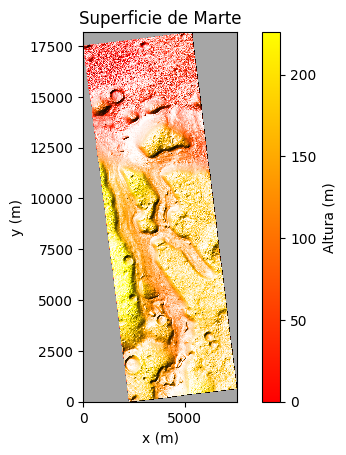

In [ ]:
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
scale=10.0174
ls = LightSource(315, 45)
rgb = ls.shade(mars_map, cmap=cmap, vmin = 0, vmax = mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = mars_map.max(), 
                extent =[0, scale*nc, 0, scale*nr], 
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.scatter([x[1] for x in camino], [x[0] for x in camino], color='blue', s=10)
plt.scatter(origen[1], origen[0], color='green', s=10)
plt.scatter(destino[1], destino[0], color='red', s=10)


plt.show()
